## Example NoiseGrad and NoiseGrad++

With a few lines of code we show how to use NoiseGrad and NoiseGrad++ with PyTorch, as a way to enhance any explanation method. 

• **Paper:** NoiseGrad: enhancing explanations by introducingstochasticity to model weights \\
• **Authors:** Kirill Bykov\*, Anna Hedström\*, Shinichi Nakajima, Marina M.-C. Höhne \\
• **Institution:** TU Berlin, ML Department, Understandable Machine Intelligence Lab \\
• **Date:** June, 2021 \\

*equal contribution


In [1]:
# Mount drive.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Installs.
!pip install captum

# Imports.
import torch
import torchvision
import copy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from captum.attr import *
from torchvision import transforms
from drive.MyDrive.Projects.NG.src import *

# Notebook settings.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
%load_ext autoreload
%autoreload 2

# Surpress warnings.
#import warnings
#warnings.filterwarnings("ignore", category=UserWarning)

### Step 1. Load data and model

In [6]:
# Load inputs and corresponding label that you want to explain.
image = transforms.ToTensor()(Image.open(f"drive/MyDrive/Projects/NG/samples/image.png")).reshape(1, 3, 224, 224).to(device)
label = torch.load(f"drive/MyDrive/Projects/NG/samples/label.pt").to(device)

# Load pre-trained ResNet18 model.
model = torchvision.models.resnet18(pretrained=True)
weights = copy.deepcopy(model.state_dict())
model.eval();

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


### Step 2. Initialize methods

In [7]:
# Initialize NoiseGrad: enhance any explanation function!
noisegrad = NoiseGrad(model=model, weights=weights, std=0.25, n=25)

# Initialize NoiseGrad++: enhance any explanation function!
noisegradp = NoiseGradPlusPlus(model=model, weights=weights, std=0.2, sg_std=0.3, n=10, m=10)

NoiseGrad initialized.
NoiseGrad++ initialized.


### Step 3. Get explanations

In [8]:
# Get baseline explanation.
expl_base = intgrad_explainer(model.to(device), image, label)

# Get NoiseGrad explanation.
expl_ng = noisegrad.enhance_explanation(inputs=image, targets=label, explanation_fn=intgrad_explainer, **{"device": device})

# Get NoiseGrad++ explanation.
expl_ngp = noisegradp.enhance_explanation(inputs=image, targets=label, explanation_fn=intgrad_explainer, **{"device": device})

### Step 4. Visualize explanations

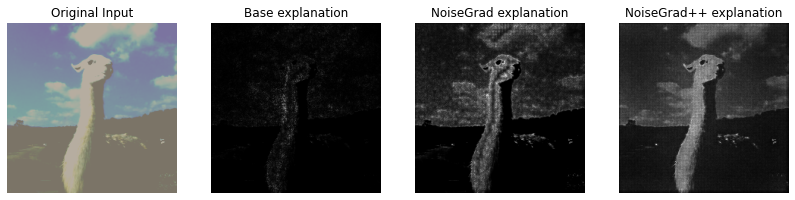

In [10]:
# Plot!
visualize_explanations(image=image, expl_base=expl_base, expl_ng=expl_ng, expl_ngp=expl_ngp, cmap="gist_gray_r")

### Ignore.

In [ ]:
# Load test data and loaders.
test_set = torchvision.datasets.ImageFolder(root='/content/drive/My Drive/imagenet_images', 
                                            transform=transforms.Compose([transforms.Resize(256),
                                                                          transforms.CenterCrop((224, 224)),
                                                                          transforms.ToTensor(),
                                                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]))
test_loader = torch.utils.data.DataLoader(test_set, shuffle=True, batch_size=64)
x_batch, y_batch = iter(test_loader).next()

import matplotlib.pyplot as plt
for ix, i in enumerate(range(0, len(x_batch))): 
    print(ix)
    plt.imshow(denormalize_image(x_batch.cpu().data[ix]).transpose(0, 1).transpose(1, 2))
    plt.show()

    # 2, 12, 24, 31

In [4]:

nr_channels = 3
img_size = 224
ix = 2 # 6 26 50

image = x_batch[ix].reshape(1, nr_channels, img_size, img_size).to(device)
label = y_batch[ix].to(device)

from torchvision.utils import save_image

save_image(image.reshape(3, 224, 224), f"drive/MyDrive/Projects/NG/samples/image.png")
torch.save(label, f"drive/MyDrive/Projects/NG/samples/label.pt")